# Polynomial Regression

---

## Breif:
Polynomial Regression allows you to fit a model to **non-linear** data, using higher degree polynomials like squares and cubes to do so.
- [Extracting non-linear Data](#extracting-data)
- [Getting polunomial features](#getting-polynomial-features)
- [Cost function](#cost-function)
- [Gradient Descent](#gradient-descent)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Extracting Data

- Simply extract the data with **pandas** and convert it into numpy ndarrays.  
- This data set is called **"Ice Cream Selling Data"** which shows the *number of units sold* per *temperature* of ice-cream.  
- Its a very simple **univariate dataset** and only has 49 training examples (This notebook is just a practice for using polynomials. For more in-depth regression, check out multivariate regression in the other folder)  

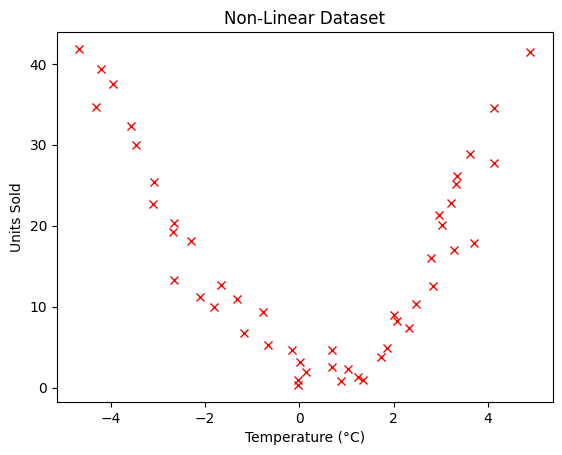

In [2]:
x_raw = pd.read_csv("icecream.csv", usecols=[0]).values
y = pd.read_csv("icecream.csv", usecols=[1]).values

# Visualize the data
plt.plot(x_raw, y, 'x', c='r')
plt.xlabel("Temperature (°C)")
plt.ylabel("Units Sold")
plt.title("Non-Linear Dataset")

plt.show()

## Getting Polynomial Features

A **Polynomial Regression Model** is defined as:  
$$
f(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_d x^d
$$

Or, using summation notation:
$$
f(x) = \sum_{i=0}^{d} w_i x^i
$$

However, a very simple implementation can be done using ``np.vstack`` AKA: "Numpy Vertical Stack"  
Where it inputs multiple numpy ndarrays, and outputs them vertically stacked in a matrix

In our case:
- ``[x ** i for i in range(degree + 1)]`` Uses an inline loop to create multiple polynomial ${x}$ features before stacking them ontop of eachother vertically
- ``.T`` Means "Transpose" and it flips the rows and collumns giving us the training samples we need.


In [31]:
def get_polynomial_features(x, degree):
    return np.hstack([x**i for i in range(degree + 1)])

## Cost function

The cost function for polynomial regression will be the MSE (Mean Squared Error) cost using L2 regularization (also known as ridge regression) to prevent the ${w}$ parameter from getting unnessecarily big

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

Where:
- $f_{w,b}(x^{(i)}$ is the model output given input ${x}$ 
- $\frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$ is the penalty / regularization term
- ${m}$ and ${n}$ are the number of training examples

Notes:  
The larger the regularization term $\lambda$ is, the bigger the "penalty" on the ${w}$ parameter is. Meaning that, this will encourage the model to keep the parameter size small as the larger it is, the more it adds to the cost.

In [39]:
def cost(w, b, x, y):
    cost = np.mean(((x @ w + b) - y)**2) / 2
    lambda_ = 0.01 # Can be changed
    penalty = np.mean(w) * lambda_ / 2
    return cost + penalty

## Gradient Descent

- Gradient descent is calulated using this (very fancy and confusing looking mathematical formula):  


$$
w_j := w_j - \alpha \frac{\partial j(w,b)}{\partial w_j} + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

$$
b := b - \alpha \frac{\partial j(w,b)}{\partial b}
$$

- But really, in code terms, those confusing derivates are just as simple as this:  
$$
\frac{\partial j(w,b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}  + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

$$
\frac{\partial j(w,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$$


See? its just the cost function with the L2 regularization (penalty term) we added before. But for the ${x}$ parameter we simply multiply the cost by ${x^i}$ And for ${b}$, its just the cost.  
That is how we *update the model's parameters* and successfully *train the model* to fit the data.

Notes:
- ${j(w,b)}$ is the cost function
- ${m}$ is the number of training examples
- ${\hat{y}}$ is the model's prediction f_wb of y
- ${y}$ is the target value y

In [ ]:
def gradient_descent(w, b, x, y, alphar, itterations, cost_arr):
    for i in range(itterations):
        f_wb = w @ x + b
        lambda_ = 0.01
        w -= alphar * (np.mean(f_wb - y * x) + np.mean(w**2) * lambda_ / 2)
        b -= alphar * np.mean(f_wb - y)

        ## for visualization purposes ##
        cost_arr.append(cost(w, b, x, y))
        ## for visualization purposes ##